In [69]:
# Helper libraries
import sys
sys.path.append('a3_framework')
import a3utils, a3tf_embed_viz, a3rnnlm
reload(a3utils)
reload(a3tf_embed_viz)
reload(a3rnnlm)

sys.path.append('../scripts')
import module_preprocess
import util, rnnlm, vocabulary1
reload(util)
reload(rnnlm)

import json, os, re, shutil, sys, time
import collections, itertools
import pickle

from IPython.display import display, HTML
from random import randint

from gensim.models import word2vec, KeyedVectors

# NLTK for NLP utils and corpora
import nltk

# NumPy and TensorFlow
import numpy as np
import tensorflow as tf
assert(tf.__version__.startswith("0.12"))

# utils.pretty_print_matrix uses Pandas. Configure float format here.
import pandas as pd
pd.set_option('float_format', lambda f: "{0:.04f}".format(f))

print "Done!"



Done!


In [2]:
samp = True
samp = '_samp' if samp else ''

In [102]:
# Load feature names
fnames = np.array(pd.read_pickle('../interim/028_preproc_heavy_shows_concat' + samp + '.p'))

# load concatenated descriptions
desc = np.array(pd.read_pickle('../interim/028_preproc_heavy_show_description_concat' + samp + '.p'))

print("Feature Names Shape:", fnames.shape)
print("Descriptions Shape:", desc.shape)
assert fnames.shape[0] == desc.shape[0]

('Feature Names Shape:', (1192, 2))
('Descriptions Shape:', (1192, 1))


In [4]:
w2vmodel = KeyedVectors.load_word2vec_format('../interim/GoogleNews-vectors-negative300.bin', binary=True)
w2vmodel.most_similar('dog')

[(u'dogs', 0.8680489659309387),
 (u'puppy', 0.8106428384780884),
 (u'pit_bull', 0.780396044254303),
 (u'pooch', 0.7627377510070801),
 (u'cat', 0.7609456777572632),
 (u'golden_retriever', 0.7500902414321899),
 (u'German_shepherd', 0.7465174198150635),
 (u'Rottweiler', 0.7437614798545837),
 (u'beagle', 0.7418621778488159),
 (u'pup', 0.740691065788269)]

In [5]:
#w2vmodel.save('../interim/gensim_model')
#w2vmodel = KeyedVectors.load('../interim/gensim_model')
w2vmodel['dog'].shape

(300,)

In [121]:
reload(module_preprocess)
lst=[]
for i in range(0, desc.shape[0]):
    text = module_preprocess.tokenize(desc[i][0], rmv_all_digits=True, lowercase = True, 
                                   lemmatizer=module_preprocess.lemmatizer)
    lst.append(text)

with open('../interim/descriptions_cleaned' + samp + '.p', 'wb') as f:
    pickle.dump(lst,f)

In [136]:
with open('../interim/descriptions_cleaned' + samp + '.p', 'rb') as f:
    desc_list = pickle.load(f)

document_vectors = []
for d in desc_list:
    if len(d) > 0:
        doc_vec = {}
        for word in d[0]:
            if word in w2vmodel:
                if len(doc_vec) == 0:
                    doc_vec = w2vmodel[word]
                else:
                    doc_vec = np.concatenate((doc_vec, w2vmodel[word]), axis=0)
        document_vectors.append(doc_vec)

with open('../interim/document_vectors_cleaned' + samp + '.p', 'wb') as f:
    pickle.dump(document_vectors,f)

In [145]:
with open('../interim/document_vectors_cleaned' + samp + '.p', 'rb') as f:
    new_doc_vector_list = pickle.load(f)
len(new_doc_vector_list)

1191

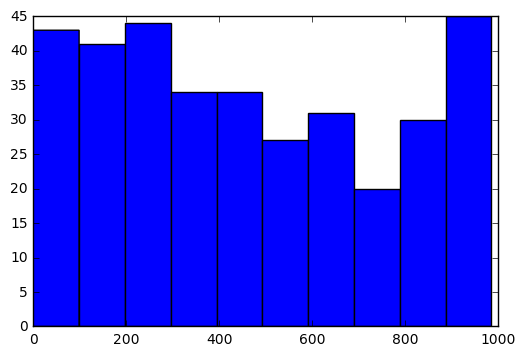

349


In [153]:
import matplotlib.pyplot as plt
a = []
for b in desc_list:
    if len(b)<1000:
        a.append(len(b))
          

plt.hist(a)
plt.show()

print len(a)
